<a href="https://colab.research.google.com/github/AyuniInaMohamaad/2023-ml-project/blob/main/AIM_ML_research_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Colab Notebook

1.   Load libraries
2.   Mount directory
3.   Load data




In [433]:
# load libraries

!pip install -q condacolab
!pip install -q condacolab basemap

import numpy as np
import pandas as pd

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

import math
import matplotlib.pyplot as plt

import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [434]:
# mount Google Drive in this notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [435]:
# figure settings
plt.rcParams['figure.figsize'] = [10, 8] # width, height in inches
plt.rcParams.update({'font.size': 21}) # change font size

# Global Map
Global map of xenolith dataset distribution

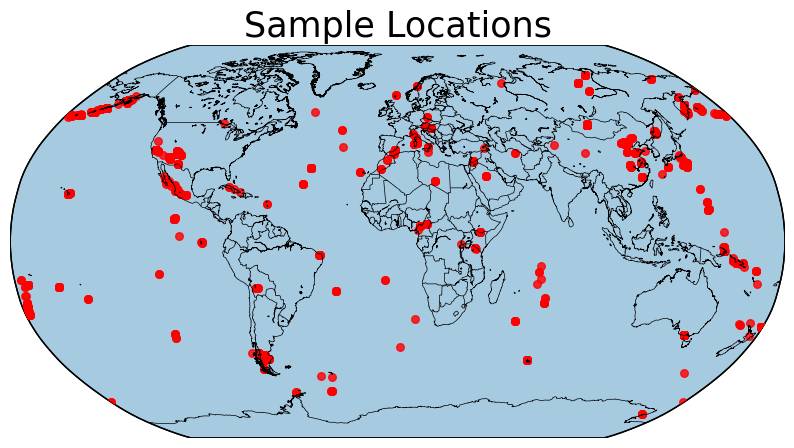

In [436]:
# load data into a pandas dataframe
file_path = "/content/drive/MyDrive/Colab Notebooks/data_ml_map.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# create the Basemap instance
m = Basemap(projection='robin', resolution='l', lat_0=0, lon_0=0)

# draw coastlines, countries, and boundaries
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawmapboundary(fill_color='#a6cae0')

# convert lat/lon coordinates to x/y coordinates
x, y = m(df['LONGITUDE'].values, df['LATITUDE'].values)

# plot the points on the map
m.scatter(x, y, s=30, alpha=0.8, c='red')

# show the map
plt.title('Sample Locations')
plt.show()

# Continental Tectonic Settings

## Covariance and Correlation Maps
Heat Map of Covariance and Correlation Matrix of the xenoliths dataset.

In [453]:
# load data
file_path = "/content/drive/MyDrive/Colab Notebooks/data_ml_cont.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# prep data
df['LABEL_TECTONIC_SETTING'] = pd.factorize(df['TECTONIC_SETTING'])[0]          # add label
df_col = df[['SIO2', 'TIO2', 'AL2O3', 'MNO',
             'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5',
             'TECTONIC_SETTING', 'LABEL_TECTONIC_SETTING']]                     # select columns
df_drop = df_col.dropna()                                                       # remove na
df_copy = df_drop[['SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5']]
df_norm_cont = ( (df_copy-df_copy.mean()) / df_copy.std() )
# plot correlation and covariance map
df_corr = df_norm_cont.corr()
cmap_corr = df_corr.style.background_gradient(axis=0, cmap='cool') 

df_cov = df_norm_cont.cov()
cmap_cov = df_cov.style.background_gradient(axis=0, cmap='cool') 

# check
# print("Covariance Matrix (Continental Tectonic Settings):\n")
display(cmap_corr)
# print("\nCorrelation Matrix (Continental Tectonic Settings):\n")
display(cmap_cov)

,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5
SIO2,1.000000,0.027008,0.620552,-0.145556,-0.775347,-0.319863,0.813507,0.571489,0.291705
TIO2,0.027008,1.000000,0.511714,-0.068708,-0.434470,0.214377,0.264669,0.245491,0.400335
AL2O3,0.620552,0.511714,1.000000,-0.179371,-0.876890,-0.031952,0.798242,0.604675,0.438208
MNO,-0.145556,-0.068708,-0.179371,1.000000,-0.068326,0.656480,-0.084299,-0.105346,0.046625
MGO,-0.775347,-0.434470,-0.876890,-0.068326,1.000000,-0.176482,-0.833661,-0.576006,-0.423821
CAO,-0.319863,0.214377,-0.031952,0.656480,-0.176482,1.000000,-0.208170,-0.261636,0.019865
NA2O,0.813507,0.264669,0.798242,-0.084299,-0.833661,-0.208170,1.000000,0.676172,0.390589
K2O,0.571489,0.245491,0.604675,-0.105346,-0.576006,-0.261636,0.676172,1.000000,0.502381
P2O5,0.291705,0.400335,0.438208,0.046625,-0.423821,0.019865,0.390589,0.502381,1.000000


,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5
SIO2,1.000000,0.027008,0.620552,-0.145556,-0.775347,-0.319863,0.813507,0.571489,0.291705
TIO2,0.027008,1.000000,0.511714,-0.068708,-0.434470,0.214377,0.264669,0.245491,0.400335
AL2O3,0.620552,0.511714,1.000000,-0.179371,-0.876890,-0.031952,0.798242,0.604675,0.438208
MNO,-0.145556,-0.068708,-0.179371,1.000000,-0.068326,0.656480,-0.084299,-0.105346,0.046625
MGO,-0.775347,-0.434470,-0.876890,-0.068326,1.000000,-0.176482,-0.833661,-0.576006,-0.423821
CAO,-0.319863,0.214377,-0.031952,0.656480,-0.176482,1.000000,-0.208170,-0.261636,0.019865
NA2O,0.813507,0.264669,0.798242,-0.084299,-0.833661,-0.208170,1.000000,0.676172,0.390589
K2O,0.571489,0.245491,0.604675,-0.105346,-0.576006,-0.261636,0.676172,1.000000,0.502381
P2O5,0.291705,0.400335,0.438208,0.046625,-0.423821,0.019865,0.390589,0.502381,1.000000


## Principal Component Analysis (PCA)
Principal Component Analysis and Biplot of PC1-PC2, PC3-PC4 and PC5-PC6.


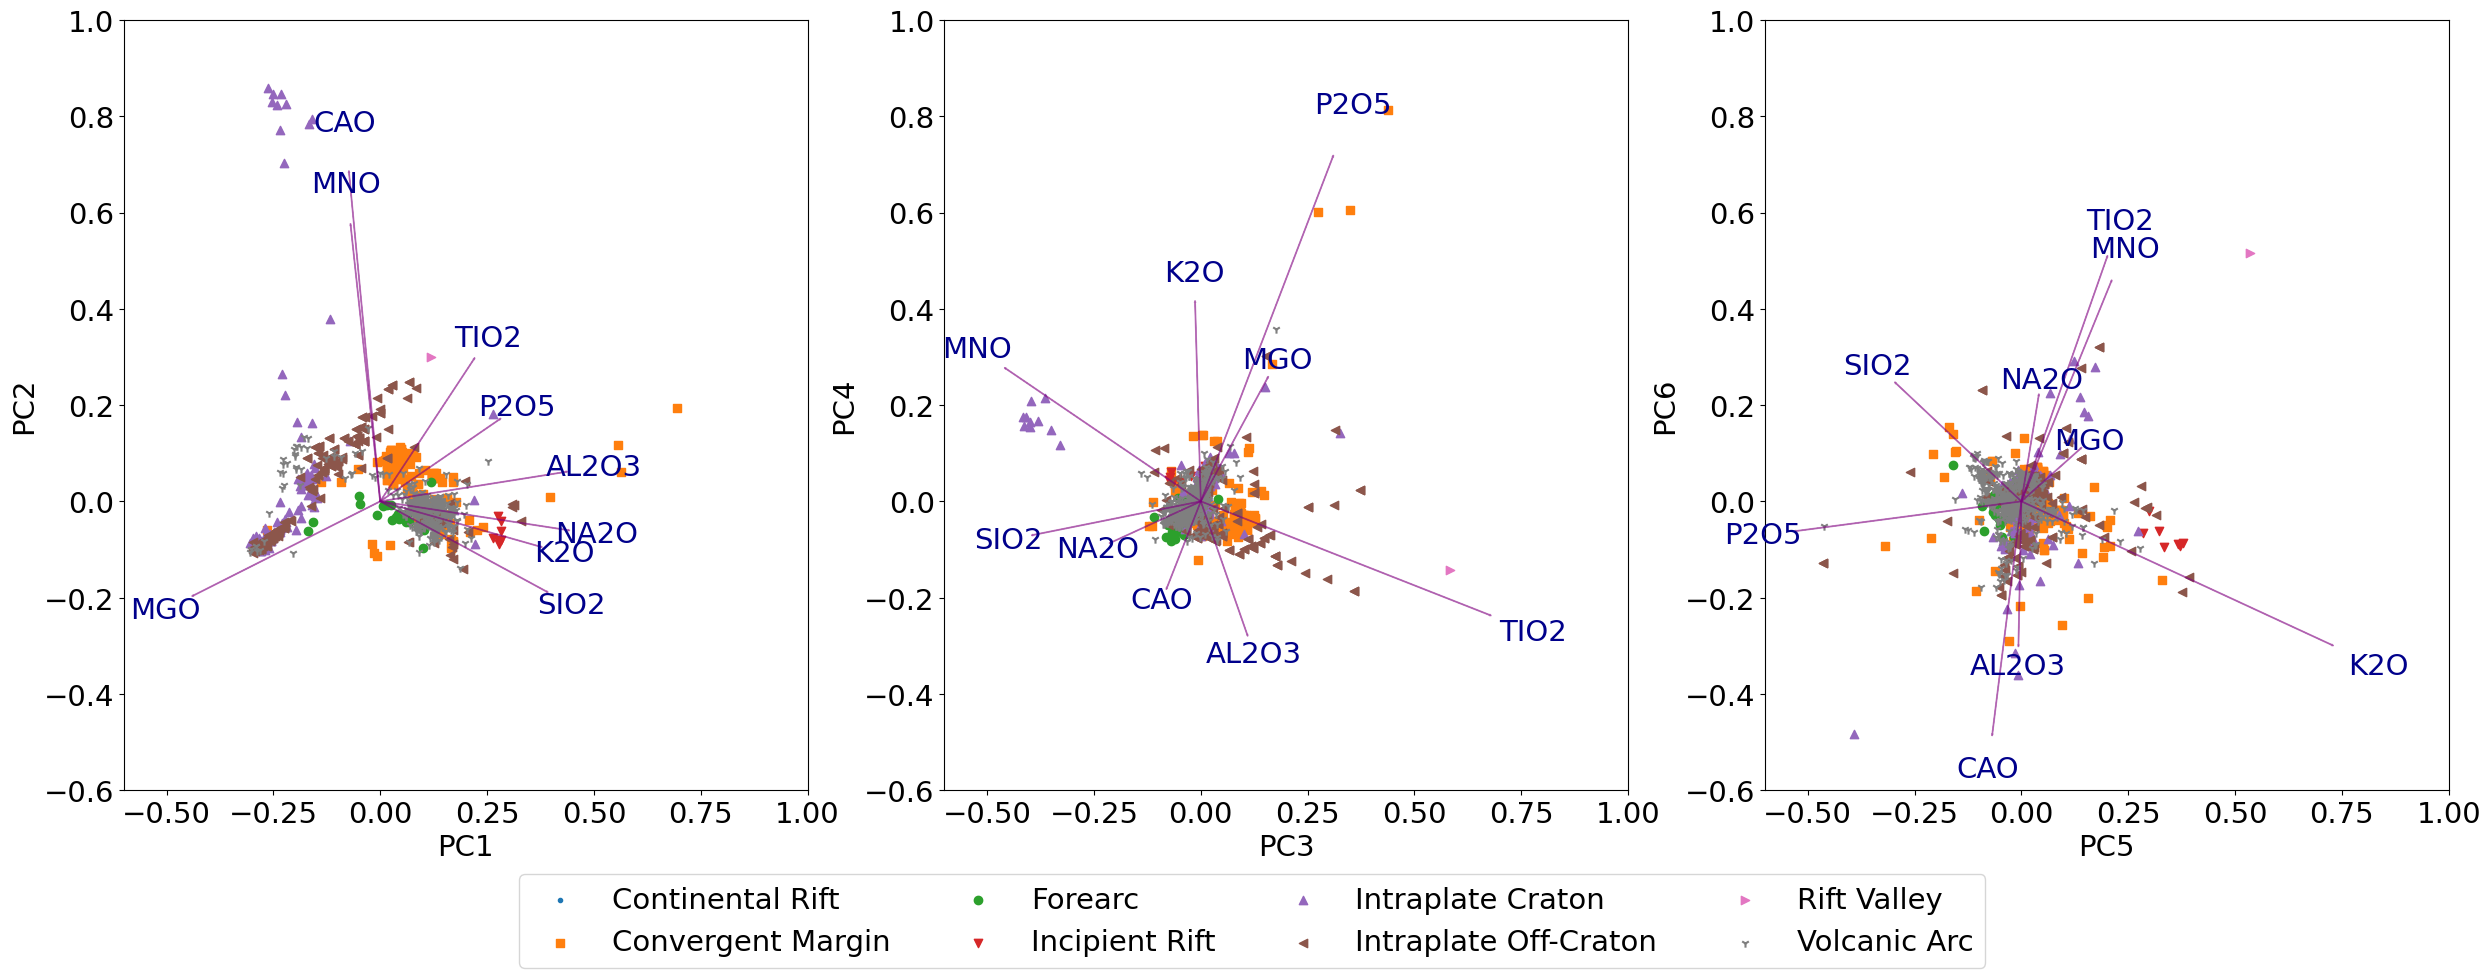

<Figure size 1000x800 with 0 Axes>

In [454]:
from matplotlib.lines import Line2D

def PCAPlot(pc, coef, labels=None):

  plt.figure(figsize=(30,10))

  coef = np.transpose(coef)
  n = coef.shape[0]

  for j, PCN in enumerate([ (1,2), (3,4), (5,6) ], 1):

    scatter_data = {}

    for i, x in enumerate(pc[:,PCN[0]-1]):

      ts = df_drop['TECTONIC_SETTING'].tolist()[i]

      if ts not in scatter_data.keys():
        scatter_data[ts] =[[], []]

      scatter_data[ts][0].append(x)
      scatter_data[ts][1].append(pc[:,PCN[1]-1][i])
  
    min_x, max_x = min(scatter_data[ts][0]), max(scatter_data[ts][0])
    min_y, max_y = min(scatter_data[ts][1]), max(scatter_data[ts][1])

    for ts in scatter_data.keys():
      if min(scatter_data[ts][0]) < min_x:
        min_x = min(scatter_data[ts][0])
      if max(scatter_data[ts][0]) > max_x:
        max_x = max(scatter_data[ts][0])
      if min(scatter_data[ts][1]) < min_y:
        min_y = min(scatter_data[ts][1])
      if max(scatter_data[ts][1]) > max_y:
        max_y = max(scatter_data[ts][1])

    scalex = 1.0/(max_x - min_x)
    scaley = 1.0/(max_y - min_y)

    for ts in scatter_data.keys():
      scatter_data[ts][0] = [ x*scalex for x in scatter_data[ts][0] ]
      scatter_data[ts][1] = [ y*scaley for y in scatter_data[ts][1] ]

    tectonic_style = {}

    for i, ts in enumerate(scatter_data.keys()):
      tectonic_style[ts] = [ [ marker for marker in Line2D.markers.keys() ][i] ]
    
    plt.subplot(1,3,j)
  
    # plot the PCA data with colors based on the specified column
    for ts in scatter_data.keys():
      plt.scatter(scatter_data[ts][0], scatter_data[ts][1], marker=tectonic_style[ts][0], label=ts.replace("_"," ").title())

    for i in range(n):
        plt.arrow(0, 0, coef[i,PCN[0]-1], 
                  coef[i,PCN[1]-1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,PCN[0]-1]*1.15,      # PC-x-axis
                  coef[i,PCN[1]-1]*1.15,     # PC-y-axis 
                  labels[i], 
                  color = 'darkblue', 
                  ha = 'center', 
                  va = 'center')

    # set labels and title
    plt.xlabel('PC' + str(PCN[0]))
    plt.ylabel('PC' + str(PCN[1]))

    plt.xlim(-0.6, 1.0)
    plt.ylim(-0.6, 1.0) 
  
    # plt.title('PCA: PC' + str(PCN[0]) + ' vs. PC' + str(PCN[1]))
  
  plt.legend(ncols=4, loc='lower center', bbox_to_anchor=(-0.75, -0.25), fancybox=True)

  # show plot
  plt.show()

  plt.tight_layout()

  return

# Apply PCA
pca = PCA()
pc = pca.fit_transform(df_norm_cont)

# print(pc)
# print(pc.shape)

# Plot PCA
PCs = pc
coef = pca.components_
labels = list(df_copy.columns)

PCAPlot(PCs, coef, labels)

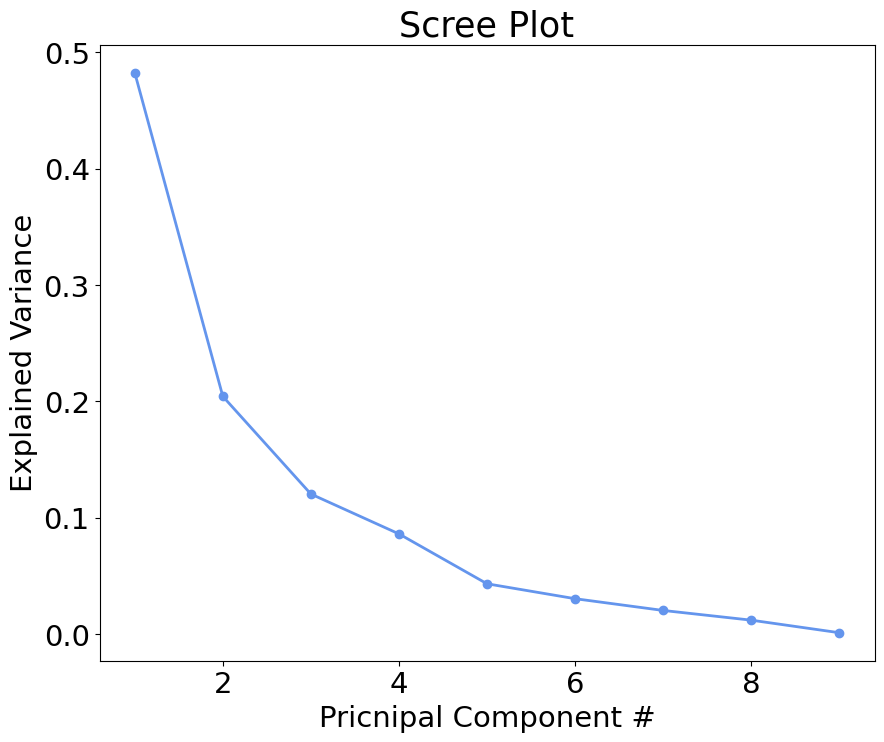

[0.4825088  0.68678667 0.80711916 0.89318115 0.93636578 0.96672327
 0.98697891 0.9988887  1.        ]


In [455]:
df_pc_evr = pca.explained_variance_ratio_

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, df_pc_evr, 'o-', linewidth=2, color='cornflowerblue')
plt.title('Scree Plot')
plt.xlabel('Pricnipal Component #')
plt.ylabel('Explained Variance')

# show plot
plt.show()

print(pca.explained_variance_ratio_.cumsum())

## K-Nearest Neighbors (KNN)
Silhoutte Score and K-Nearest Neighbors.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


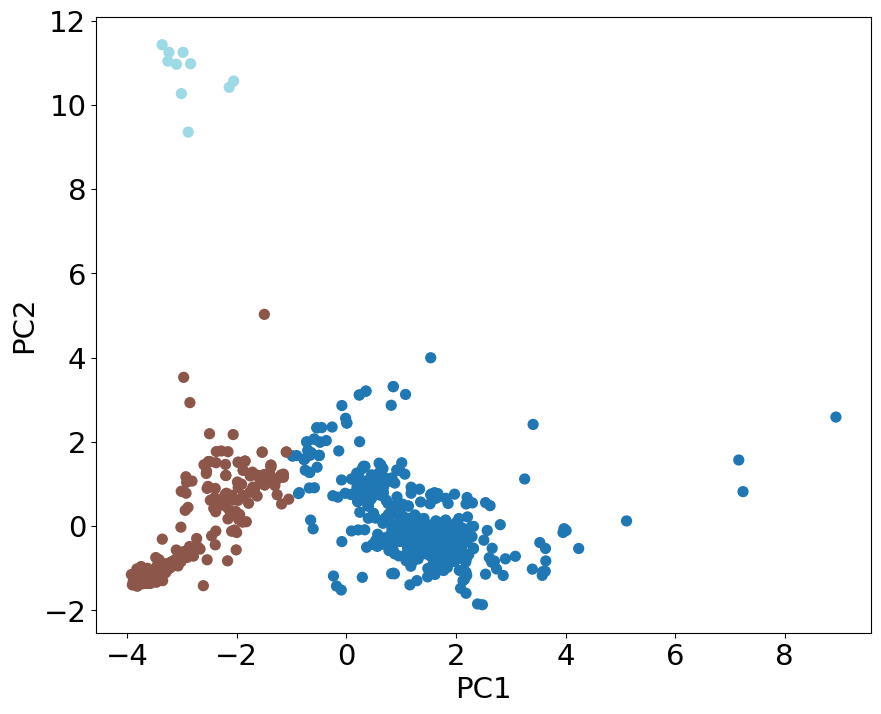

0.549859403328331
For n_clusters = 2 The average silhouette_score is : 0.5377538397528236


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.549859403328331
For n_clusters = 4 The average silhouette_score is : 0.5269348316893367


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5371760928635566
For n_clusters = 6 The average silhouette_score is : 0.5365824727769476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


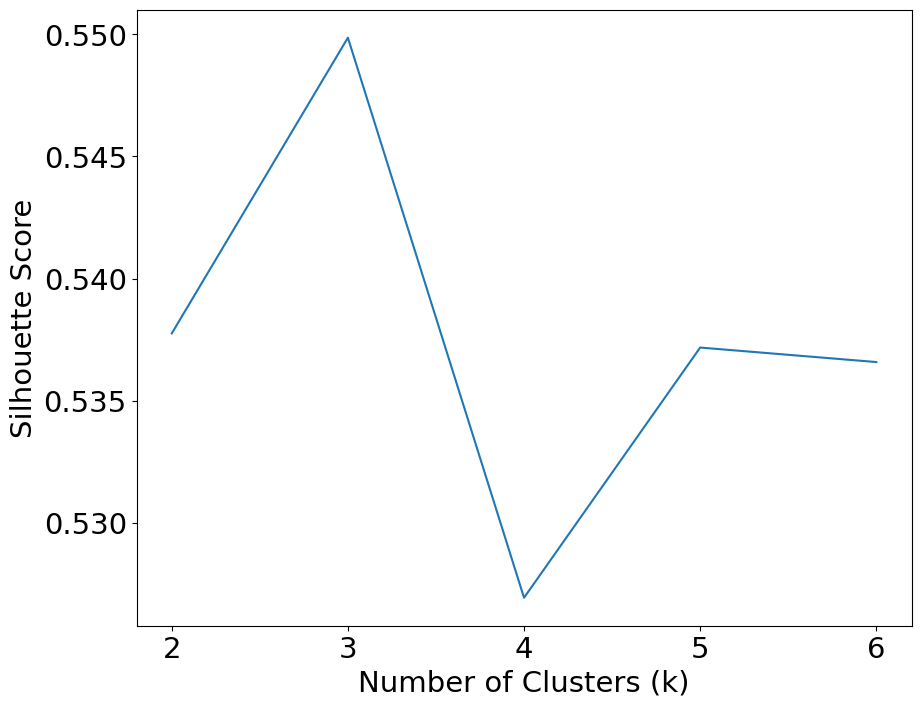

In [456]:
# apply k-means clustering
pc_k = pc[:,0:7]
X = pc_k
KMean = KMeans(n_clusters=3) 
KMean.fit(X)

# make a scatter plot
clusters = KMean.predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20',
                marker='o', s=50)
# plt.xlim(min, max)
# plt.ylim(min, max)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Scatter Plot of PC1 vs PC2') 

# show plot
plt.show()

# compute silhoutte score
score_2 = silhouette_score(X, clusters)
print(score_2)

k_range = range (2,7)
silhouette_scores = []

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters)
    label = kmeans.fit_predict(X)
    
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

    silhouette_avg = silhouette_score(X, label)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# plot the silhouette scores
plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Oceanic Tectonic Settings

## Covariance and Correlation Maps
Heat Map of Covariance and Correlation Matrix of the xenoliths dataset.

In [457]:
# load data
file_path = "/content/drive/MyDrive/Colab Notebooks/data_ml_ocean.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# prep data
df['LABEL_TECTONIC_SETTING'] = pd.factorize(df['TECTONIC_SETTING'])[0]          # add label
df_col = df[['SIO2', 'TIO2', 'AL2O3', 'MNO',
             'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5',
             'TECTONIC_SETTING', 'LABEL_TECTONIC_SETTING']]                     # select columns
df_drop = df_col.dropna()                                                       # remove na
df_copy = df_drop[['SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5']]
df_norm_oc = ( (df_copy-df_copy.mean()) / df_copy.std() )
# plot correlation and covariance map
df_corr = df_norm_oc.corr()
cmap_corr = df_corr.style.background_gradient(axis=0, cmap='cool') 

df_cov = df_norm_oc.cov()
cmap_cov = df_cov.style.background_gradient(axis=0, cmap='cool') 

# check
#print("Covariance Matrix (Oceanic Tectonic Settings):\n")
display(cmap_corr)
#print("\nCorrelation Matrix (Oceanic Tectonic Settings):\n")
display(cmap_cov)

,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5
SIO2,1.000000,-0.224901,0.508455,-0.342206,-0.823360,-0.546565,0.526699,0.403461,0.029358
TIO2,-0.224901,1.000000,0.041645,0.284578,-0.114417,0.430500,-0.034855,-0.074002,0.275857
AL2O3,0.508455,0.041645,1.000000,-0.182241,-0.811657,-0.112354,0.578857,0.531317,0.256289
MNO,-0.342206,0.284578,-0.182241,1.000000,0.180824,0.297255,0.164792,-0.297326,0.217405
MGO,-0.823360,-0.114417,-0.811657,0.180824,1.000000,0.249028,-0.644407,-0.512359,-0.241929
CAO,-0.546565,0.430500,-0.112354,0.297255,0.249028,1.000000,-0.224177,-0.485352,0.079928
NA2O,0.526699,-0.034855,0.578857,0.164792,-0.644407,-0.224177,1.000000,0.324093,0.233051
K2O,0.403461,-0.074002,0.531317,-0.297326,-0.512359,-0.485352,0.324093,1.000000,-0.014326
P2O5,0.029358,0.275857,0.256289,0.217405,-0.241929,0.079928,0.233051,-0.014326,1.000000


,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5
SIO2,1.000000,-0.224901,0.508455,-0.342206,-0.823360,-0.546565,0.526699,0.403461,0.029358
TIO2,-0.224901,1.000000,0.041645,0.284578,-0.114417,0.430500,-0.034855,-0.074002,0.275857
AL2O3,0.508455,0.041645,1.000000,-0.182241,-0.811657,-0.112354,0.578857,0.531317,0.256289
MNO,-0.342206,0.284578,-0.182241,1.000000,0.180824,0.297255,0.164792,-0.297326,0.217405
MGO,-0.823360,-0.114417,-0.811657,0.180824,1.000000,0.249028,-0.644407,-0.512359,-0.241929
CAO,-0.546565,0.430500,-0.112354,0.297255,0.249028,1.000000,-0.224177,-0.485352,0.079928
NA2O,0.526699,-0.034855,0.578857,0.164792,-0.644407,-0.224177,1.000000,0.324093,0.233051
K2O,0.403461,-0.074002,0.531317,-0.297326,-0.512359,-0.485352,0.324093,1.000000,-0.014326
P2O5,0.029358,0.275857,0.256289,0.217405,-0.241929,0.079928,0.233051,-0.014326,1.000000


## Principal Component Analysis (PCA)
Principal Component Analysis and Biplot of PC1-PC2, PC3-PC4 and PC5-PC6.


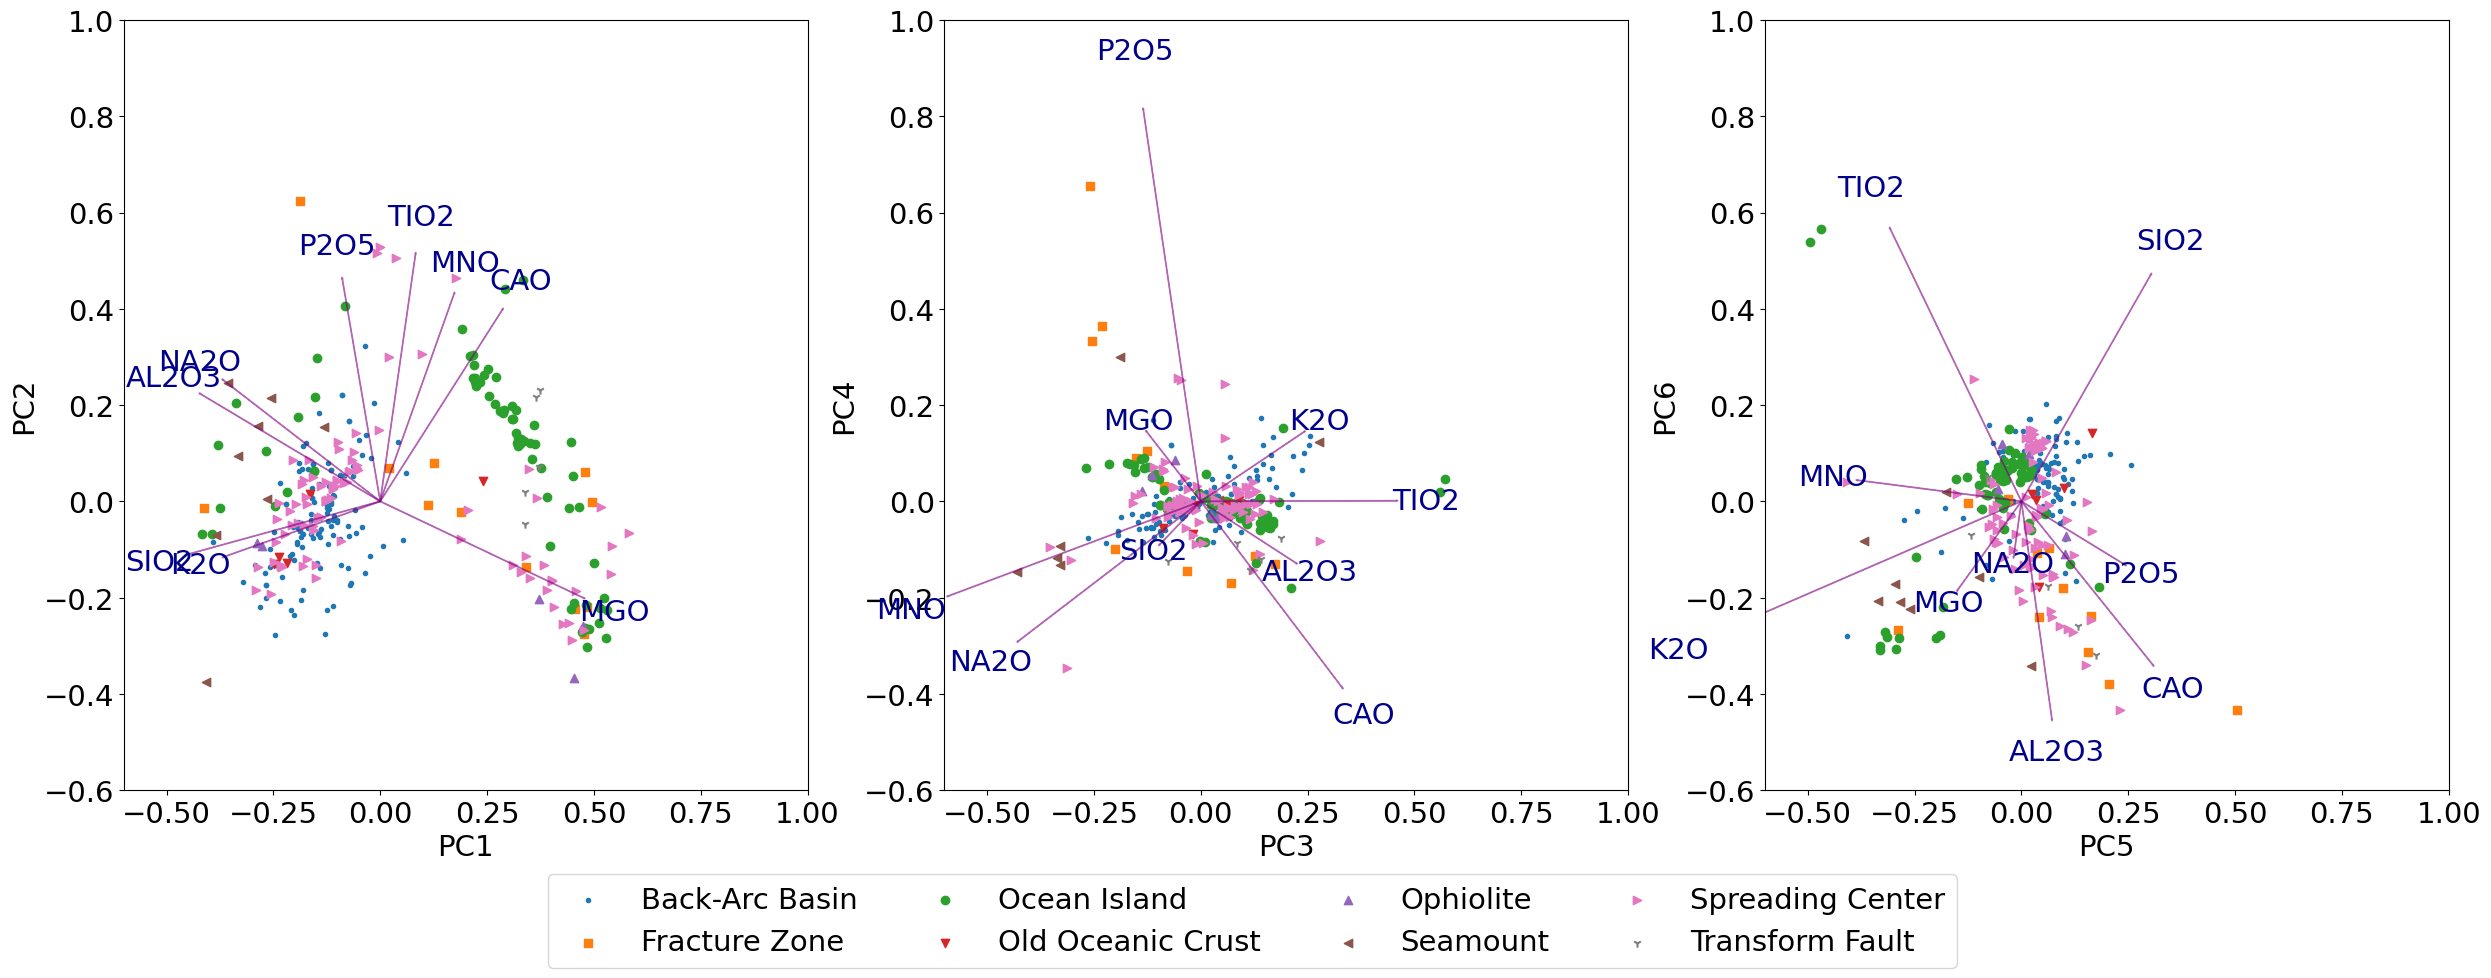

<Figure size 1000x800 with 0 Axes>

In [458]:
from matplotlib.lines import Line2D

def PCAPlot(pc, coef, labels=None):

  plt.figure(figsize=(30,10))

  coef = np.transpose(coef)
  n = coef.shape[0]

  for j, PCN in enumerate([ (1,2), (3,4), (5,6) ], 1):

    scatter_data = {}

    for i, x in enumerate(pc[:,PCN[0]-1]):

      ts = df_drop['TECTONIC_SETTING'].tolist()[i]

      if ts not in scatter_data.keys():
        scatter_data[ts] =[[], []]

      scatter_data[ts][0].append(x)
      scatter_data[ts][1].append(pc[:,PCN[1]-1][i])
  
    min_x, max_x = min(scatter_data[ts][0]), max(scatter_data[ts][0])
    min_y, max_y = min(scatter_data[ts][1]), max(scatter_data[ts][1])

    for ts in scatter_data.keys():
      if min(scatter_data[ts][0]) < min_x:
        min_x = min(scatter_data[ts][0])
      if max(scatter_data[ts][0]) > max_x:
        max_x = max(scatter_data[ts][0])
      if min(scatter_data[ts][1]) < min_y:
        min_y = min(scatter_data[ts][1])
      if max(scatter_data[ts][1]) > max_y:
        max_y = max(scatter_data[ts][1])

    scalex = 1.0/(max_x - min_x)
    scaley = 1.0/(max_y - min_y)

    for ts in scatter_data.keys():
      scatter_data[ts][0] = [ x*scalex for x in scatter_data[ts][0] ]
      scatter_data[ts][1] = [ y*scaley for y in scatter_data[ts][1] ]

    tectonic_style = {}

    for i, ts in enumerate(scatter_data.keys()):
      tectonic_style[ts] = [ [ marker for marker in Line2D.markers.keys() ][i] ]
    
    plt.subplot(1,3,j)
  
    # plot the PCA data with colors based on the specified column
    for ts in scatter_data.keys():
      plt.scatter(scatter_data[ts][0], scatter_data[ts][1], marker=tectonic_style[ts][0], label=ts.replace("_"," ").title())

    for i in range(n):
        plt.arrow(0, 0, coef[i,PCN[0]-1], 
                  coef[i,PCN[1]-1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,PCN[0]-1]*1.15,      # PC-x-axis
                  coef[i,PCN[1]-1]*1.15,     # PC-y-axis 
                  labels[i], 
                  color = 'darkblue', 
                  ha = 'center', 
                  va = 'center')

    # set labels and title
    plt.xlabel('PC' + str(PCN[0]))
    plt.ylabel('PC' + str(PCN[1]))

    plt.xlim(-0.6, 1.0)
    plt.ylim(-0.6, 1.0) 
  
    # plt.title('PCA: PC' + str(PCN[0]) + ' vs. PC' + str(PCN[1]))
  
  plt.legend(ncols=4, loc='lower center', bbox_to_anchor=(-0.75, -0.25), fancybox=True)

  # show plot
  plt.show()

  plt.tight_layout()

  return

# Apply PCA
pca = PCA()
pc = pca.fit_transform(df_norm_oc)

# print(pc)
# print(pc.shape)

# Plot PCA
PCs = pc
coef = pca.components_
labels = list(df_copy.columns)

PCAPlot(PCs, coef, labels)

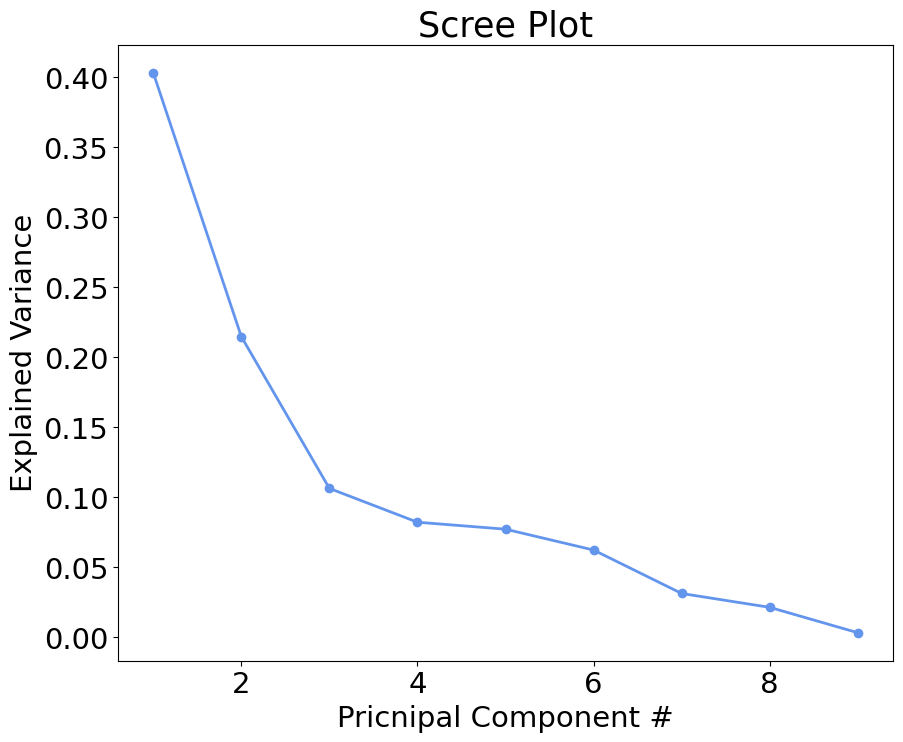

[0.40316887 0.61775634 0.72387621 0.80583059 0.88280227 0.94486629
 0.97589517 0.99701494 1.        ]


In [459]:
df_pc_evr = pca.explained_variance_ratio_

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, df_pc_evr, 'o-', linewidth=2, color='cornflowerblue')
plt.title('Scree Plot')
plt.xlabel('Pricnipal Component #')
plt.ylabel('Explained Variance')

# show plot
plt.show()

print(pca.explained_variance_ratio_.cumsum())

## K-Nearest Neighbors (KNN)
Silhoutte Score and K-Nearest Neighbors.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


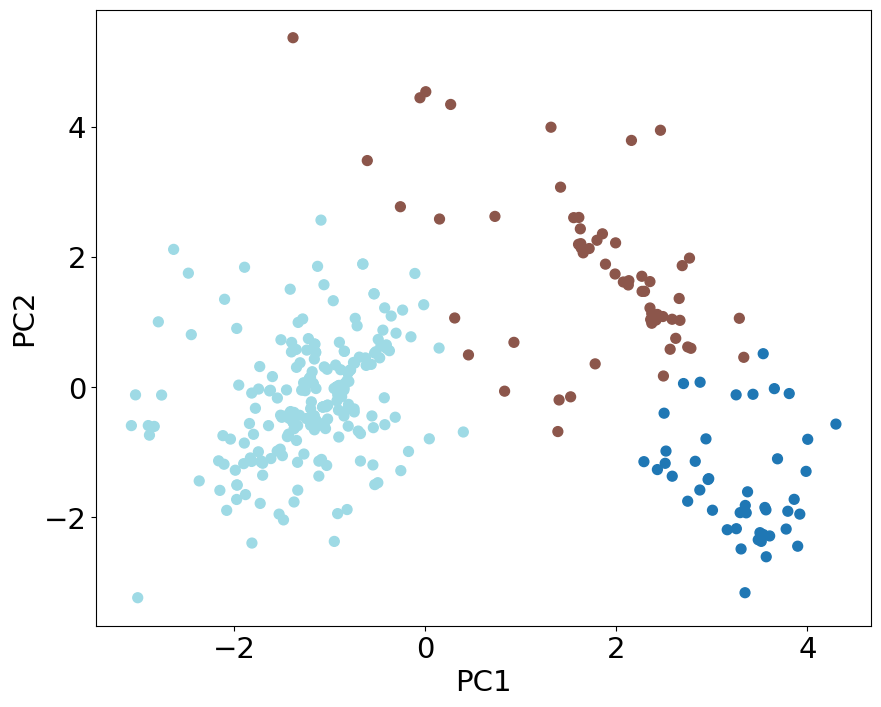

0.4530720656215652
For n_clusters = 2 The average silhouette_score is : 0.4345576524223695
For n_clusters = 3 The average silhouette_score is : 0.4530720656215652


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3006728572682375
For n_clusters = 5 The average silhouette_score is : 0.3210957579808884


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3389806668559653


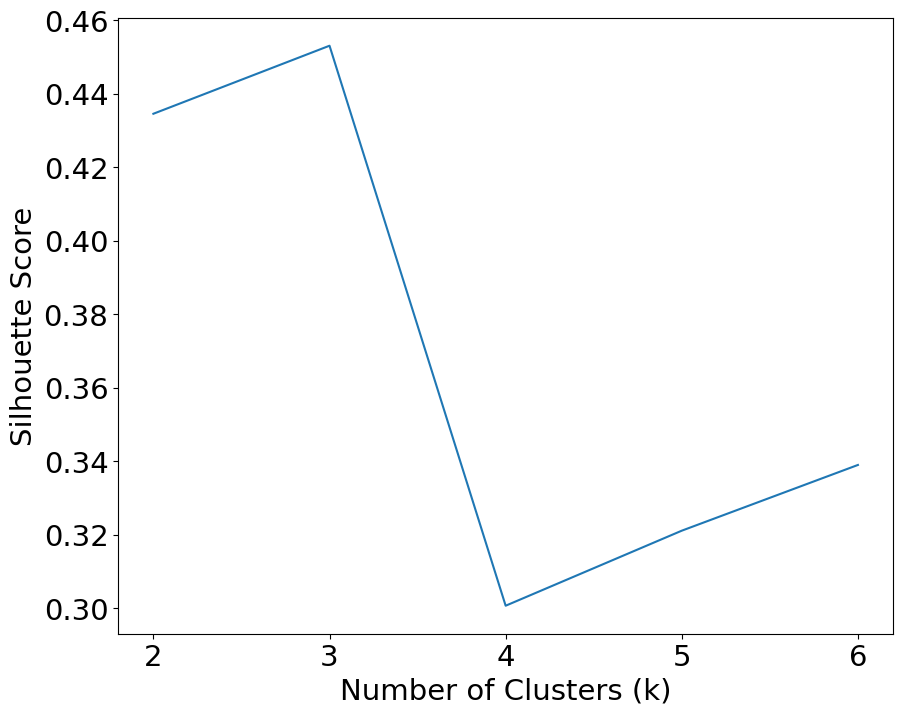

In [460]:
# apply k-means clustering
pc_k = pc[:,0:7]
X = pc_k
KMean = KMeans(n_clusters=3) 
KMean.fit(X)

# make a scatter plot
clusters = KMean.predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20',
                marker='o', s=50)
# plt.xlim(min, max)
# plt.ylim(min, max)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Scatter Plot of PC1 vs PC2') 

# show plot
plt.show()

# compute silhoutte score
score_2 = silhouette_score(X, clusters)
print(score_2)

k_range = range (2,7)
silhouette_scores = []

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters)
    label = kmeans.fit_predict(X)
    
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

    silhouette_avg = silhouette_score(X, label)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# plot the silhouette scores
plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()